In [1]:
import pandas as pd
import numpy as np

In [2]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import collections
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
nltk.download('stopwords')
nltk.downloader.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sarah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Reading in the data
We have 2 data frames for lyrics and audio features. We want to clean and create one data frame with both of these features.

In [3]:
df=pd.read_csv("lyrics-v5.csv")
df3=pd.read_csv("bts_song_features_224.csv")

In [4]:
df3.rename(columns = {'track_popularity':'popularity'}, inplace = True)
df3.head()

,Unnamed: 0,album_id,album_title,album_rd,album_seq,track_id,track_name,popularity,danceability,energy,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,6egaEe9JaULuUCkihSnYlH,2 Cool 4 Skool,2013-06-12,1,1UlnDZ5ubsSX3xrXu063dZ,Intro: 2 Cool 4 Skool,51,0.894,0.835,...,0.179,0.532,94.871,audio_features,1UlnDZ5ubsSX3xrXu063dZ,spotify:track:1UlnDZ5ubsSX3xrXu063dZ,https://api.spotify.com/v1/tracks/1UlnDZ5ubsSX...,https://api.spotify.com/v1/audio-analysis/1Uln...,63787,4
1,1,6egaEe9JaULuUCkihSnYlH,2 Cool 4 Skool,2013-06-12,2,5pjHS3EpHurMyIpB2QBnEd,We Are Bulletproof Pt.2,65,0.753,0.950,...,0.134,0.868,144.020,audio_features,5pjHS3EpHurMyIpB2QBnEd,spotify:track:5pjHS3EpHurMyIpB2QBnEd,https://api.spotify.com/v1/tracks/5pjHS3EpHurM...,https://api.spotify.com/v1/audio-analysis/5pjH...,223933,4
2,2,6egaEe9JaULuUCkihSnYlH,2 Cool 4 Skool,2013-06-12,3,4Ut6UU8Yyihz1jCZWSCQpu,Skit: Circle Room Talk,44,0.598,0.356,...,0.913,0.817,121.045,audio_features,4Ut6UU8Yyihz1jCZWSCQpu,spotify:track:4Ut6UU8Yyihz1jCZWSCQpu,https://api.spotify.com/v1/tracks/4Ut6UU8Yyihz...,https://api.spotify.com/v1/audio-analysis/4Ut6...,131907,3
3,3,6egaEe9JaULuUCkihSnYlH,2 Cool 4 Skool,2013-06-12,4,089PFeXotzDLNQz9NCk6pF,No More Dream,66,0.438,0.864,...,0.431,0.594,167.898,audio_features,089PFeXotzDLNQz9NCk6pF,spotify:track:089PFeXotzDLNQz9NCk6pF,https://api.spotify.com/v1/tracks/089PFeXotzDL...,https://api.spotify.com/v1/audio-analysis/089P...,222067,4
4,4,6egaEe9JaULuUCkihSnYlH,2 Cool 4 Skool,2013-06-12,5,2QVXLAI2Io3tDmhFOSumr0,Interlude,51,0.914,0.276,...,0.392,0.854,125.897,audio_features,2QVXLAI2Io3tDmhFOSumr0,spotify:track:2QVXLAI2Io3tDmhFOSumr0,https://api.spotify.com/v1/tracks/2QVXLAI2Io3t...,https://api.spotify.com/v1/audio-analysis/2QVX...,52440,4


In [5]:
df3.columns

Index(['Unnamed: 0', 'album_id', 'album_title', 'album_rd', 'album_seq',
       'track_id', 'track_name', 'popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href',
       'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')

In [6]:
df.head()

,id,album_title,eng_album_title,album_rd,album_seq,track_title,kor_track_title,eng_track_title,lyrics,hidden_track,remix,featured,performed_by,repackaged,lang,has_full_ver
0,0,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,1,Intro: 2 Cool 4 Skool (ft. DJ Friz),NaN,Intro: 2 Cool 4 Skool (ft. DJ Friz),we’re now going to progress to some steps\nwhi...,False,False,DJ Friz,RM,False,KOR,False
1,1,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,2,We Are Bulletproof Pt.2,NaN,We Are Bulletproof Pt.2,(what) give it to me\n (what) be nervous\n (wh...,False,False,NaN,BTS,False,KOR,False
2,2,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,3,Skit: Circle Room Talk,NaN,Skit: Circle Room Talk,rap monster: it was a big hit\nv: year 2006!\n...,False,False,NaN,BTS,False,KOR,False
3,3,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,4,No More Dream,NaN,No More Dream,"hey, what's your dream?\n hey, what’s your dre...",False,False,NaN,BTS,False,KOR,False
4,4,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,5,Interlude,NaN,Interlude,NaN,False,False,NaN,BTS,False,NaN,False


### Clean the data frames
The separate lyrics and audio features data frames are mismatching. We reordered and dropped columns to prepare the data frames for merging.

In [7]:
df.drop([7,8],inplace=True)
df.reset_index(inplace=True)
df.id = df.id.astype(float)
df.id[75]=81.5
df.sort_values(by=['id'],inplace=True)
df.drop([136,137,149],inplace=True)
df.reset_index(drop=True,inplace=True)
df.drop([172,180],inplace=True)
df.reset_index(inplace=True)
df.id[185]=191.5
df.sort_values(by=['id'],inplace=True)
df.id[213]=205.2
df.id[214]=205.3
df.id[215]=205.4
df.id[216]=205.5
df.id[217]=205.6
df.id[218]=205.7
df.id[219]=205.8
df.id[220]=205.9
df.sort_values(by=['id'],inplace=True)
df.reset_index(drop=True)
df.drop(columns=['level_0','index','id'],inplace=True)

<ipython-input-7-3a5a23eda569>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.id[75]=81.5
<ipython-input-7-3a5a23eda569>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.id[185]=191.5
<ipython-input-7-3a5a23eda569>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.id[213]=205.2
<ipython-input-7-3a5a23eda569>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in th

### Merge the data frames

In [8]:
popular = df3.popularity
df_merged = pd.concat([df,popular], axis = 1)
df_merged.head()

,album_title,eng_album_title,album_rd,album_seq,track_title,kor_track_title,eng_track_title,lyrics,hidden_track,remix,featured,performed_by,repackaged,lang,has_full_ver,popularity
0,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,1,Intro: 2 Cool 4 Skool (ft. DJ Friz),NaN,Intro: 2 Cool 4 Skool (ft. DJ Friz),we’re now going to progress to some steps\nwhi...,False,False,DJ Friz,RM,False,KOR,False,51
1,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,2,We Are Bulletproof Pt.2,NaN,We Are Bulletproof Pt.2,(what) give it to me\n (what) be nervous\n (wh...,False,False,NaN,BTS,False,KOR,False,65
2,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,3,Skit: Circle Room Talk,NaN,Skit: Circle Room Talk,rap monster: it was a big hit\nv: year 2006!\n...,False,False,NaN,BTS,False,KOR,False,44
3,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,4,No More Dream,NaN,No More Dream,"hey, what's your dream?\n hey, what’s your dre...",False,False,NaN,BTS,False,KOR,False,66
4,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,5,Interlude,NaN,Interlude,NaN,False,False,NaN,BTS,False,NaN,False,51


In [11]:
df=df_merged

### Removing rows with no lyrics

In [12]:
df = df[df['lyrics'].notna()]
df.reset_index(inplace=True)
df.drop(columns="index",inplace=True)
df.head()

C:\Users\sarah\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,album_title,eng_album_title,album_rd,album_seq,track_title,kor_track_title,eng_track_title,lyrics,hidden_track,remix,featured,performed_by,repackaged,lang,has_full_ver,popularity
0,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,1,Intro: 2 Cool 4 Skool (ft. DJ Friz),NaN,Intro: 2 Cool 4 Skool (ft. DJ Friz),we’re now going to progress to some steps\nwhi...,False,False,DJ Friz,RM,False,KOR,False,51
1,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,2,We Are Bulletproof Pt.2,NaN,We Are Bulletproof Pt.2,(what) give it to me\n (what) be nervous\n (wh...,False,False,NaN,BTS,False,KOR,False,65
2,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,3,Skit: Circle Room Talk,NaN,Skit: Circle Room Talk,rap monster: it was a big hit\nv: year 2006!\n...,False,False,NaN,BTS,False,KOR,False,44
3,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,4,No More Dream,NaN,No More Dream,"hey, what's your dream?\n hey, what’s your dre...",False,False,NaN,BTS,False,KOR,False,66
4,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,6,좋아요 (I Like It),좋아요,I Like It,wanna be loved…\n\ndon’t wanna be fool wanna b...,False,False,NaN,BTS,False,KOR,False,74


## NLP Analysis
Performing Sentiment Analysis and finding most common words.

In [13]:
sentiment_scores=[]
most_common_words=[]
allWords2=[]
for i in range(len(df.lyrics)):
    
    
    #VADER sentiment score 
    sia = SentimentIntensityAnalyzer()
    sentiment_scores.append(sia.polarity_scores(df.lyrics[i]))
    
    #tokenizing - turning a text string to a list of words
    
    text = df.lyrics[i]
    text = text.replace(',',"")
    text = text.replace('(',"")
    text = text.replace(')',"")
    text = text.replace('\'',"")
    text = text.replace('’',"")
    text = text.replace('?',"")
    text = text.replace('*',"")
    text = text.replace('.',"")
    text = text.replace('!',"")
    text = text.replace(':',"")
    text = text.replace('-'," ")
    
    allWords = nltk.tokenize.word_tokenize(text)
    
    #lemmatizing - cutting words down to their roots
    
    wordnet_lemmatizer = WordNetLemmatizer()
    
    allWords2=[]
    
    for word in allWords:
        allWords2.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
    
    
    #finding most common words in lyrics
    #allWords = nltk.tokenize.word_tokenize(df.lyrics[i])
    allWordDist = nltk.FreqDist(w.lower() for w in allWords2)
    stopwords = nltk.corpus.stopwords.words('english')
    allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords2 if w not in stopwords)  
    

    #print(allWords)

    counter = collections.Counter(allWordExceptStopDist)

    top10=(counter.most_common()[1:11])

    most_common_words.append(top10)
    
    counter.clear()
    
    
    
    

In [14]:
df_senti=pd.DataFrame(sentiment_scores)
df_sentiment=df.join(df_senti)
df_common=pd.DataFrame(most_common_words)
df_final=df_sentiment.join(df_common)
df_final.drop(columns=["kor_track_title","album_title","hidden_track","featured","remix","repackaged","lang","has_full_ver","album_seq","track_title"],inplace=True)
df_final.head()

,eng_album_title,album_rd,eng_track_title,lyrics,performed_by,popularity,neg,neu,pos,compound,0,1,2,3,4,5,6,7,8,9
0,2 Cool 4 Skool,2013-06-12,Intro: 2 Cool 4 Skool (ft. DJ Friz),we’re now going to progress to some steps\nwhi...,RM,51,0.029,0.638,0.333,0.9719,"(cool, 8)","(4, 4)","(skool, 4)","(exclusive, 2)","(n, 2)","(teenagers, 2)","(10s, 2)","(20s, 2)","(let, 2)","(talk, 2)"
1,2 Cool 4 Skool,2013-06-12,We Are Bulletproof Pt.2,(what) give it to me\n (what) be nervous\n (wh...,BTS,65,0.083,0.797,0.121,0.9723,"(click, 16)","(bang, 16)","(like, 11)","(bulletproof, 10)","(sing, 10)","(go, 6)","(much, 6)","(give, 4)","(look, 4)","(throw, 4)"
2,2 Cool 4 Skool,2013-06-12,Skit: Circle Room Talk,rap monster: it was a big hit\nv: year 2006!\n...,BTS,44,0.093,0.769,0.138,0.9762,"(monster, 16)","(v, 11)","(suga, 11)","(hope, 11)","(jimin, 11)","(j, 10)","(go, 9)","(yeah, 8)","(laugh, 6)","(hurt, 6)"
3,2 Cool 4 Skool,2013-06-12,No More Dream,"hey, what's your dream?\n hey, what’s your dre...",BTS,66,0.071,0.717,0.212,0.9965,"(la, 30)","(whats, 15)","(dont, 14)","(hey, 12)","(see, 9)","(youre, 8)","(go, 7)","(say, 5)","(way, 5)","(big, 4)"
4,2 Cool 4 Skool,2013-06-12,I Like It,wanna be loved…\n\ndon’t wanna be fool wanna b...,BTS,74,0.108,0.526,0.366,0.9996,"(na, 23)","(love, 14)","(like, 13)","(yeah, 12)","(dont, 11)","(pretty, 10)","(woman, 9)","(fool, 7)","(cool, 7)","(look, 7)"


In [15]:
df_final=df_final.sort_values("popularity", ascending=False)

In [16]:
df_final.drop_duplicates(subset="eng_track_title",inplace=True) #getting rid of duplicate songs

In [17]:
df_final.head()

,eng_album_title,album_rd,eng_track_title,lyrics,performed_by,popularity,neg,neu,pos,compound,0,1,2,3,4,5,6,7,8,9
213,NaN,2021-06-04,Butter,Smooth like butter\nLike a criminal undercover...,BTS,86,0.068,0.769,0.162,0.9864,"(get, 15)","(right, 11)","(i, 9)","(let, 9)","(leave, 7)","(beat, 7)","(side, 6)","(step, 6)","(roll, 6)","(butter, 5)"
169,MAP OF THE SOUL: PERSONA,2019-04-12,Boy With Luv ft. Halsey,(oh-oh-oh-oh-oh)\n(oh-oh-oh-oh-oh)\n(oh-oh-oh-...,BTS,81,0.018,0.820,0.161,0.9947,"(yeah, 15)","(want, 12)","(boy, 11)","(luv, 7)","(something, 6)","(stronger, 6)","(moment, 6)","(love, 6)","(everything, 5)","(high, 5)"
195,Dynamite (DayTime Version),2020-08-28,Dynamite,"Cause I, I, I'm in the stars tonight\nSo watch...",BTS,79,0.033,0.804,0.163,0.9946,"(im, 14)","(dynamite, 14)","(i, 13)","(like, 13)","(oh, 12)","(so, 11)","(dyn, 10)","(light, 9)","(alight, 7)","(life, 7)"
143,Love Yourself: Answer,2018-08-24,Euphoria,you are the sunlight that rose again in my lif...,JUNGKOOK,78,0.027,0.745,0.228,0.9967,"(dream, 10)","(im, 8)","(hand, 7)","(take, 6)","(cause, 6)","(place, 5)","(dont, 4)","(get, 4)","(go, 4)","(hear, 3)"
182,MAP OF THE SOUL: 7,2020-02-21,Filter,"that uninterested face of yours, the bored tip...",JIMIN,78,0.025,0.861,0.114,0.9688,"(filter, 8)","(pick, 6)","(yeah, 4)","(oh, 4)","(new, 4)","(im, 4)","(look, 3)","(ill, 3)","(world, 3)","(want, 3)"


## Sentiment Analysis
### Visualizations

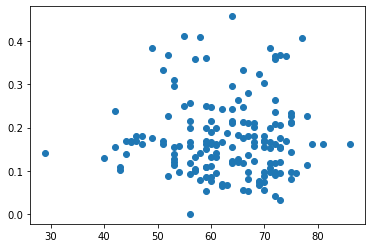

In [18]:
plt.scatter(df_final.popularity,df_final.pos)

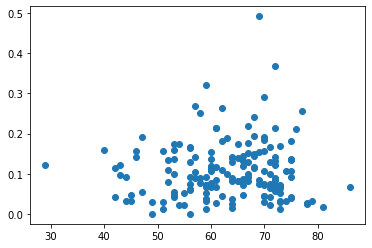

In [19]:
plt.scatter(df_final.popularity,df_final.neg)

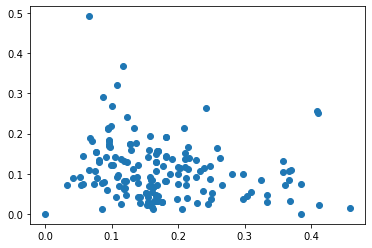

In [20]:
plt.scatter(df_final.pos,df_final.neg)

In [21]:
np.corrcoef(df_final[["neg", "neu", "pos", "compound", "popularity"]], rowvar = False)
#potentially high correlation between sentiment scores

array([[ 1.00000000e+00, -5.44492360e-01, -1.86903155e-01,
        -6.01755063e-01,  5.89558453e-02],
       [-5.44492360e-01,  1.00000000e+00, -7.22203480e-01,
        -5.26689867e-02, -4.24102571e-02],
       [-1.86903155e-01, -7.22203480e-01,  1.00000000e+00,
         5.57627735e-01,  7.93795255e-04],
       [-6.01755063e-01, -5.26689867e-02,  5.57627735e-01,
         1.00000000e+00, -8.77011274e-02],
       [ 5.89558453e-02, -4.24102571e-02,  7.93795255e-04,
        -8.77011274e-02,  1.00000000e+00]])

### Model
From these plots and correlation matrix, we hypothesize that maybe songs with more emotion (in either direction) lead to higher popularity, and wonder if sentiment scores will have predictive power.

We can use Kernel Density Estimation to classify the numeric popularity scores into high/low classes.

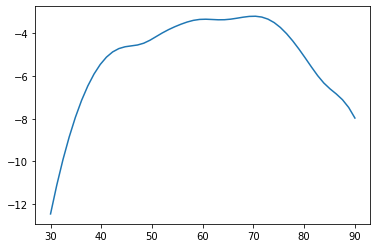

In [63]:
from sklearn.neighbors import KernelDensity
kde = KernelDensity(kernel='gaussian', bandwidth=3).fit(np.array(df_final.popularity[:len(df_final)-1]).reshape(-1,1))
s = np.linspace(30,90)
e = kde.score_samples(s.reshape(-1,1))
plt.plot(s, e)

In [64]:
from scipy.signal import argrelextrema
mi, ma = argrelextrema(e, np.less)[0], argrelextrema(e, np.greater)[0]
print("Minima:", s[mi])
print("Maxima:", s[ma])

Minima: [63.06122449]
Maxima: [60.6122449  70.40816327]


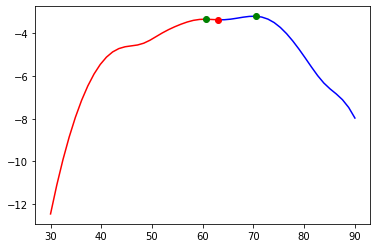

In [65]:
plt.plot(s[:mi[0]+1], e[:mi[0]+1], 'r',
     s[mi[0]:], e[mi[0]:], 'b',
     s[ma], e[ma], 'go',
     s[mi], e[mi], 'ro')

In [67]:
clusters = []
for i in range(len(df_final.popularity)):
    if df_final.popularity[i] < 63.06122449:
        clusters.append("low")
    else: clusters.append("high")

We can now attempt to classify the data into the high and low categories.

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_final[["neg", "neu", "pos"]], clusters, test_size=0.3)

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.38


After fitting our initial model, we can plot the error for different K to choose the optimal value.

In [76]:
error_rate = []
# Will take some time
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

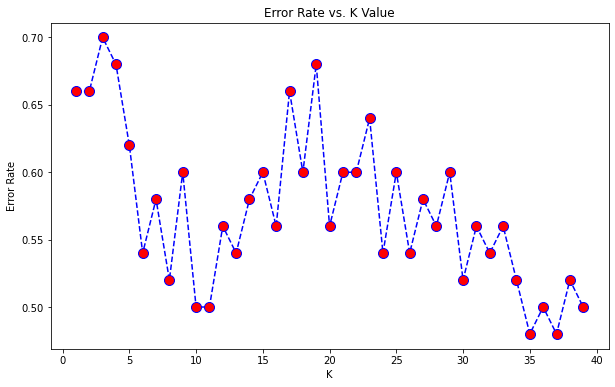

In [77]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

From the plot above, we choose K = 10 to minimize error for our final model.

In [78]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5


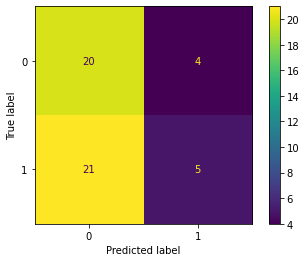

In [79]:
cm = metrics.confusion_matrix(y_test,y_pred)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

## Most Popular Words Analysis

extracting popular words from the columns of tuples.

In [84]:
df_final.rename(columns = {0:'pop1',1:'pop2',2:'pop3',3:'pop4',4:'pop5',5:'pop6',6:'pop7',7:'pop8',8:'pop9',9:'pop10'}, inplace = True)

In [85]:
df_final.reset_index(drop=True,inplace=True)

In [86]:
#drop songs with less than 10 words
df_final.drop([130],inplace=True)

In [87]:
df_final.reset_index(drop=True,inplace=True)

In [88]:
most_pop_word=[]
most_pop_word2=[]
most_pop_word3=[]
most_pop_word4=[]
most_pop_word5=[]
for i in range(len(df_final)):
    most_pop_word.append(df_final.pop1[i][0])
    most_pop_word2.append(df_final.pop2[i][0])
    most_pop_word3.append(df_final.pop3[i][0])
    most_pop_word4.append(df_final.pop4[i][0])
    most_pop_word5.append(df_final.pop5[i][0])

In [89]:
df_final["most_pop_word"]=most_pop_word
df_final["most_pop_word2"]=most_pop_word2
df_final["most_pop_word3"]=most_pop_word3
df_final["most_pop_word4"]=most_pop_word4
df_final["most_pop_word5"]=most_pop_word5

In [35]:
df_final.head()

,eng_album_title,album_rd,eng_track_title,lyrics,performed_by,popularity,neg,neu,pos,compound,...,pop6,pop7,pop8,pop9,pop10,most_pop_word,most_pop_word2,most_pop_word3,most_pop_word4,most_pop_word5
0,NaN,2021-06-04,Butter,Smooth like butter\nLike a criminal undercover...,BTS,86,0.068,0.769,0.162,0.9864,...,"(beat, 7)","(side, 6)","(step, 6)","(roll, 6)","(butter, 5)",get,right,i,let,leave
1,MAP OF THE SOUL: PERSONA,2019-04-12,Boy With Luv ft. Halsey,(oh-oh-oh-oh-oh)\n(oh-oh-oh-oh-oh)\n(oh-oh-oh-...,BTS,81,0.018,0.820,0.161,0.9947,...,"(stronger, 6)","(moment, 6)","(love, 6)","(everything, 5)","(high, 5)",yeah,want,boy,luv,something
2,Dynamite (DayTime Version),2020-08-28,Dynamite,"Cause I, I, I'm in the stars tonight\nSo watch...",BTS,79,0.033,0.804,0.163,0.9946,...,"(so, 11)","(dyn, 10)","(light, 9)","(alight, 7)","(life, 7)",im,dynamite,i,like,oh
3,Love Yourself: Answer,2018-08-24,Euphoria,you are the sunlight that rose again in my lif...,JUNGKOOK,78,0.027,0.745,0.228,0.9967,...,"(place, 5)","(dont, 4)","(get, 4)","(go, 4)","(hear, 3)",dream,im,hand,take,cause
4,MAP OF THE SOUL: 7,2020-02-21,Filter,"that uninterested face of yours, the bored tip...",JIMIN,78,0.025,0.861,0.114,0.9688,...,"(im, 4)","(look, 3)","(ill, 3)","(world, 3)","(want, 3)",filter,pick,yeah,oh,new


Create word clouds for a top popular song and top negative song.

In [90]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

ModuleNotFoundError: No module named 'wordcloud'

In [72]:
most_neg=df_final.sort_values("neg",ascending=False)
most_pos=df_final.sort_values("pos",ascending=False)

most_neg.reset_index(drop=True,inplace=True)
most_pos.reset_index(drop=True,inplace=True)

In [120]:
most_neg.head()

,eng_album_title,album_rd,eng_track_title,lyrics,performed_by,popularity,neg,neu,pos,compound,...,pop6,pop7,pop8,pop9,pop10,most_pop_word,most_pop_word2,most_pop_word3,most_pop_word4,most_pop_word5
0,MAP OF THE SOUL: 7,2020-02-21,UGH!,"let's go, yeah, yeah, yeah\n\ncrackle, that em...",RM; SUGA; J-HOPE,69,0.492,0.443,0.066,-0.9999,...,"(im, 12)","(become, 8)","(boom, 6)","(malice, 6)","(fill, 6)",rage,go,yeah,rag,ahem
1,Love Yourself: Her,2017-09-18,Dimple,you hide but only appear when you smile\nwhere...,BTS,72,0.368,0.515,0.117,-0.9988,...,"(angel, 4)","(want, 4)","(smile, 3)","(see, 3)","(yes, 3)",dangerous,ille~gal,dimple,illegal,oh
2,WINGS,2016-10-10,Am I Wrong,"am i wrong, fallin' in love with you\ntell me ...",BTS,59,0.320,0.572,0.108,-0.9989,...,"(world, 4)","(yeah, 4)","(seem, 4)","(like, 4)","(dont, 3)",go,wrong,oh,ready,worlds
3,You Never Walk Alone,2017-02-13,Not Today,all the underdogs in the world\na day may come...,BTS,70,0.291,0.621,0.087,-0.9990,...,"(ready, 8)","(believe, 8)","(fire, 7)","(everyone, 6)","(day, 5)",hey,dont,hand,die,gun
4,The Most Beautiful Moment In Life Pt.2,2015-09-30,Outro: House of Cards,"again insecure, in danger again\nso bad why, w...",BTS,57,0.268,0.632,0.100,-0.9900,...,"(end, 4)","(like, 4)","(cant, 3)","(time, 3)","(hard, 2)",even,collapse,house,make,card


In [136]:
most_pos_words=[]
temp=[]
for i in range(10,20):
    temp.append(most_pos.iloc[:,i][1][0])
    temp=temp*most_pos.iloc[:,i][1][1]
    most_pos_words=most_pos_words+temp
    temp.clear()

In [137]:
most_neg_words=[]
temp=[]
for i in range(10,20):
    temp.append(most_neg.iloc[:,i][0][0])
    temp=temp*most_neg.iloc[:,i][0][1]
    most_neg_words=most_neg_words+temp
    temp.clear()

In [138]:
most_neg_words=unique_string=(" ").join(most_neg_words)
most_pos_words=unique_string=(" ").join(most_pos_words)

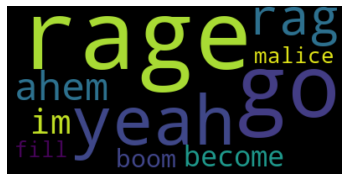

In [141]:
wordcloud = WordCloud(collocations=False).generate(most_neg_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

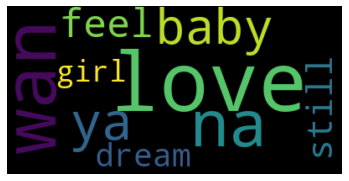

In [142]:
wordcloud = WordCloud(collocations=False).generate(most_pos_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Scratch work

In [32]:
'''
nltk pretrained sentiment analyzer called VALER. Not very good at long compound sentences 
and better for short "social media" posts


shows how negative, positive, the lyrics are 
'''

sia = SentimentIntensityAnalyzer()
sia.polarity_scores(df.lyrics[1])

{'neg': 0.083, 'neu': 0.797, 'pos': 0.121, 'compound': 0.9723}

In [33]:
allWords = nltk.tokenize.word_tokenize(df.lyrics[1])
allWordDist = nltk.FreqDist(w.lower() for w in allWords)
stopwords = nltk.corpus.stopwords.words('english')
allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w not in stopwords)  

In [37]:
mostCommon= allWordDist.most_common(10)
mostCommon2= allWordExceptStopDist.most_common(10)

In [35]:
mostCommon #need to get rid of stop words

[(',', 27),
 ('i', 25),
 ('we', 23),
 ('(', 22),
 (')', 22),
 ('it', 17),
 ('oh', 16),
 ('click', 16),
 ('bang', 16),
 ('’', 14)]

In [38]:
mostCommon2

[(',', 27),
 ('(', 22),
 (')', 22),
 ('oh', 16),
 ('click', 16),
 ('bang', 16),
 ('’', 14),
 ('like', 11),
 ('bulletproof', 10),
 ('sing', 9)]

In [64]:
text = df.lyrics[1]
text = text.replace(',',"")
text = text.replace('(',"")
text = text.replace(')',"")
text = text.replace('\'',"")
text = text.replace('’',"")
text = text.replace('?',"")


text_tokens = word_tokenize(text)

text_tokens

tokens_without_sw = [word for word in text_tokens if not word in stopwords]

print(tokens_without_sw)

['give', 'nervous', 'one', 'end', 'bulletproof', 'bulletproof', 'bulletproof', 'name', 'jungkook', 'scale', 'nationwide', 'pulled', 'all-nighters', 'practice', 'rooms', 'instead', 'school', 'dancing', 'singing', 'guys', 'partied', 'gave', 'sleep', 'dreams', 'spent', 'night', 'holding', 'pen', 'closing', 'eyes', 'morning', 'sun', 'rises', 'limit', 'broken', 'double', 'standards', 'many', 'oppositions', 'got', 'lucky', 'contacted', 'agency', 'yall', 'called', 'rappers', 'cant', 'sing', 'rapper', 'title', 'extravagance', 'everywhere', 'go', 'everything', 'show', 'much', 'sharpened', 'sword', 'people', 'looked', 'oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'hey', 'shout', 'oh', '!', 'throw', 'stone', 'youve', 'done', 'much', 'go', 'hard', 'fear', 'click', 'click', 'bang', 'bang', 'sing', 'like', 'click', 'click', 'bang', 'bang', 'sing', 'like', 'oh', '!', 'throw', 'stone', 'youve', 'done', 'much', 'go', 'hard', 'fear', 'click', 'click', 'bang', 'bang', 'sing', 'like', 'click', 'click', 'bang', 'ban

In [49]:
# counter = collections.Counter(tokens_without_sw)
# print(counter.most_common())

[('oh', 16), ('click', 16), ('bang', 16), ('like', 11), ('bulletproof', 10), ('sing', 9), ('go', 6), ('much', 6), ('!', 4), ('throw', 4), ('stone', 4), ('youve', 4), ('done', 4), ('hard', 4), ('fear', 4), ('give', 3), ('nervous', 3), ('guys', 2), ('rapper', 2), ('everywhere', 2), ('everything', 2), ('show', 2), ('sharpened', 2), ('sword', 2), ('people', 2), ('looked', 2), ('hey', 2), ('shout', 2), ('look', 2), ('nothing', 2), ('still', 2), ('monster', 2), ('impossible', 2), ('jungkook', 1), ('scale', 1), ('nationwide', 1), ('pulled', 1), ('all-nighters', 1), ('practice', 1), ('rooms', 1), ('instead', 1), ('school', 1), ('dancing', 1), ('singing', 1), ('partied', 1), ('gave', 1), ('sleep', 1), ('dreams', 1), ('spent', 1), ('night', 1), ('holding', 1), ('pen', 1), ('closing', 1), ('eyes', 1), ('morning', 1), ('sun', 1), ('rises', 1), ('limit', 1), ('broken', 1), ('double', 1), ('standards', 1), ('many', 1), ('oppositions', 1), ('got', 1), ('lucky', 1), ('contacted', 1), ('agency', 1), ('

In [50]:
top10=(counter.most_common()[1:10])

In [51]:
top10_df=pd.DataFrame(top10)
top10_df
top10_df.rename(columns={0: "word", 1: "frequency"},inplace=True)

<BarContainer object of 9 artists>

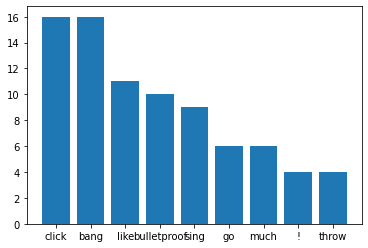

In [52]:
plt.bar(top10_df.word,top10_df.frequency)

In [28]:
df2=pd.read_csv("updated_Spotify_BTS_AudioFeatures.csv")
df2.head()

,Unnamed: 0,Index,Title,Artist,Release,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,popularity
0,0,1,Like,BTS,2013/6/12,0.582,0.726,0,-4.174,0,0.1160,0.27100,0.000000,0.227,0.768,100.450,1HQHuPpr2s2z3VIBTLtUmv,231883,34
1,1,2,No More Dream,BTS,2013/6/12,0.436,0.869,2,-5.174,1,0.4720,0.01240,0.000002,0.494,0.612,167.766,4frlkLwlnm58ejpNwWjxyl,221593,32
2,2,3,We Are Bulletproof Pt.2,BTS,2013/6/12,0.754,0.952,8,-5.110,0,0.1530,0.00945,0.000006,0.189,0.868,144.051,2Kspa0jD2MSkaEdonf4Cnb,225360,31
3,3,4,Attack on Bangtan,BTS,2013/9/11,0.722,0.961,11,-2.548,0,0.2670,0.20300,0.000000,0.121,0.678,118.016,6bCoSWW1zyQrwQDSMEmsVy,247160,8
4,4,5,Coffee,BTS,2013/9/11,0.652,0.794,0,-6.604,1,0.0957,0.00808,0.000000,0.298,0.545,92.045,0Tb8sBQ9fseZbDRzRSxTdi,261453,10


In [12]:
df3=pd.read_csv("bts_song_features_224.csv")
df3.head(20)

,Unnamed: 0,id,name,popularity
0,0,1UlnDZ5ubsSX3xrXu063dZ,Intro: 2 Cool 4 Skool,51
1,1,5pjHS3EpHurMyIpB2QBnEd,We Are Bulletproof Pt.2,65
2,2,4Ut6UU8Yyihz1jCZWSCQpu,Skit: Circle Room Talk,44
3,3,089PFeXotzDLNQz9NCk6pF,No More Dream,66
4,4,2QVXLAI2Io3tDmhFOSumr0,Interlude,51
5,5,55Ctj6nVfobn9AcPe6sLG2,Like,74
6,6,1GPIdEcxPjPIYGmN08b1yf,Outro: Circle Room Cypher,47
7,7,3FdanLGasOj37Xi316GfZ4,"Intro: O!RUL8,2?",51
8,8,7JosxtkCqIQieNWXA2Dj3v,N.O,60
9,9,29vOLabxvytbI8fX9xgTaD,We On,56


In [211]:
df=pd.read_csv("lyrics-v5.csv")

In [212]:
df.drop([7,8],inplace=True)
df.reset_index(inplace=True)
df.id = df.id.astype(float)
df.id[75]=81.5
df.sort_values(by=['id'],inplace=True)
df.drop([136,137,149],inplace=True)
df.reset_index(drop=True,inplace=True)
df.drop([172,180],inplace=True)
df.reset_index(inplace=True)
df.id[185]=191.5
df.sort_values(by=['id'],inplace=True)
df.id[213]=205.2
df.id[214]=205.3
df.id[215]=205.4
df.id[216]=205.5
df.id[217]=205.6
df.id[218]=205.7
df.id[219]=205.8
df.id[220]=205.9
df.sort_values(by=['id'],inplace=True)
df.reset_index(drop=True)
df.drop(columns=['level_0','index','id'],inplace=True)

/var/folders/d0/r5_rt10j15j98xny820n56kw0000gp/T/ipykernel_5507/878152620.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.id[75]=81.5
/var/folders/d0/r5_rt10j15j98xny820n56kw0000gp/T/ipykernel_5507/878152620.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.id[185]=191.5
/var/folders/d0/r5_rt10j15j98xny820n56kw0000gp/T/ipykernel_5507/878152620.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.id[213]=205.2
/var/folde

In [213]:
popular = df3.popularity
df_merged = pd.concat([df,popular], axis = 1)
df_merged.head()

,album_title,eng_album_title,album_rd,album_seq,track_title,kor_track_title,eng_track_title,lyrics,hidden_track,remix,featured,performed_by,repackaged,lang,has_full_ver,popularity
0,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,1,Intro: 2 Cool 4 Skool (ft. DJ Friz),NaN,Intro: 2 Cool 4 Skool (ft. DJ Friz),we’re now going to progress to some steps\nwhi...,False,False,DJ Friz,RM,False,KOR,False,51
1,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,2,We Are Bulletproof Pt.2,NaN,We Are Bulletproof Pt.2,(what) give it to me\n (what) be nervous\n (wh...,False,False,NaN,BTS,False,KOR,False,65
2,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,3,Skit: Circle Room Talk,NaN,Skit: Circle Room Talk,rap monster: it was a big hit\nv: year 2006!\n...,False,False,NaN,BTS,False,KOR,False,44
3,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,4,No More Dream,NaN,No More Dream,"hey, what's your dream?\n hey, what’s your dre...",False,False,NaN,BTS,False,KOR,False,66
4,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,5,Interlude,NaN,Interlude,NaN,False,False,NaN,BTS,False,NaN,False,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,"Butter (Hotter, Sweeter, Cooler) - EP",NaN,2021-06-04,1,Butter,NaN,Butter,Smooth like butter\nLike a criminal undercover...,False,False,NaN,BTS,False,ENG,False,86
220,"Butter (Hotter, Sweeter, Cooler) - EP",NaN,2021-06-04,2,Butter (Hotter Remix),NaN,Butter (Hotter Remix),Smooth like butter\nLike a criminal undercover...,False,False,NaN,BTS,False,ENG,False,61
221,"Butter (Hotter, Sweeter, Cooler) - EP",NaN,2021-06-04,3,Butter (Sweeter Remix),NaN,Butter (Sweeter Remix),Smooth like butter\nLike a criminal undercover...,False,False,NaN,BTS,False,ENG,False,59
222,"Butter (Hotter, Sweeter, Cooler) - EP",NaN,2021-06-04,4,Butter (Cooler Remix),NaN,Butter (Cooler Remix),Smooth like butter\nLike a criminal undercover...,False,False,NaN,BTS,False,ENG,False,60


In [29]:
df_merged = df.merge(df3, left_on=['eng_track_title'], right_on=['name'])
df_merged.head()

,id_x,album_title,eng_album_title,album_rd,album_seq,track_title,kor_track_title,eng_track_title,lyrics,hidden_track,remix,featured,performed_by,repackaged,lang,has_full_ver,Unnamed: 0,id_y,name,popularity
0,1,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,2,We Are Bulletproof Pt.2,NaN,We Are Bulletproof Pt.2,(what) give it to me\n (what) be nervous\n (wh...,False,False,NaN,BTS,False,KOR,False,1,5pjHS3EpHurMyIpB2QBnEd,We Are Bulletproof Pt.2,65
1,2,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,3,Skit: Circle Room Talk,NaN,Skit: Circle Room Talk,rap monster: it was a big hit\nv: year 2006!\n...,False,False,NaN,BTS,False,KOR,False,2,4Ut6UU8Yyihz1jCZWSCQpu,Skit: Circle Room Talk,44
2,3,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,4,No More Dream,NaN,No More Dream,"hey, what's your dream?\n hey, what’s your dre...",False,False,NaN,BTS,False,KOR,False,3,089PFeXotzDLNQz9NCk6pF,No More Dream,66
3,4,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,5,Interlude,NaN,Interlude,NaN,False,False,NaN,BTS,False,NaN,False,4,2QVXLAI2Io3tDmhFOSumr0,Interlude,51
4,6,2 Cool 4 Skool,2 Cool 4 Skool,2013-06-12,7,Outro: Circle Room Cypher,NaN,Outro: Circle Room Cypher,"hurry up, hurry-hurry-hurry-hurry-hurry-hurry-...",False,False,NaN,BTS,False,KOR,False,6,1GPIdEcxPjPIYGmN08b1yf,Outro: Circle Room Cypher,47


In [30]:
df_merged.shape

(77, 20)

In [ ]:
test=df.lyrics[1]
wordnet_lemmatizer = WordNetLemmatizer()


text = test
text = text.replace(',',"")
text = text.replace('(',"")
text = text.replace(')',"")
text = text.replace('\'',"")
text = text.replace('’',"")
text = text.replace('?',"")
text = text.replace('*',"")
text = text.replace('.',"")
text = text.replace('!',"")

allWords = nltk.tokenize.word_tokenize(text)


allWords2=[]

for word in allWords:
    #print ("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word, pos="v")))
    allWords2.append(wordnet_lemmatizer.lemmatize(word, pos="v"))

In [36]:
df_subset=df_final[["popularity","most_pop_word"]]
df_subset.head()

,popularity,most_pop_word
0,86,get
1,81,yeah
2,79,im
3,78,dream
4,78,filter


In [37]:
most_pop_songs_by_word=df_subset.groupby(['most_pop_word']).mean()
most_pop_songs_by_word.sort_values("popularity",ascending=False)

,popularity
most_pop_word,
filter,78.0
dream,78.0
bring,76.0
little,75.0
thang,75.0
...,...
cool,51.0
go,51.0
monster,44.0


In [35]:
df_ml=df_final.drop(columns=["pop1","pop2","pop3","pop4","pop5","pop6","pop7","pop8","pop9","pop10"])

In [36]:
df_ml.head()

,eng_album_title,album_rd,eng_track_title,lyrics,performed_by,popularity,neg,neu,pos,compound,most_pop_word,most_pop_word2,most_pop_word3,most_pop_word4,most_pop_word5
0,NaN,2021-06-04,Butter,Smooth like butter\nLike a criminal undercover...,BTS,86,0.068,0.769,0.162,0.9864,get,right,i,let,leave
1,MAP OF THE SOUL: PERSONA,2019-04-12,Boy With Luv ft. Halsey,(oh-oh-oh-oh-oh)\n(oh-oh-oh-oh-oh)\n(oh-oh-oh-...,BTS,81,0.018,0.820,0.161,0.9947,yeah,want,boy,luv,something
2,Dynamite (DayTime Version),2020-08-28,Dynamite,"Cause I, I, I'm in the stars tonight\nSo watch...",BTS,79,0.033,0.804,0.163,0.9946,im,dynamite,i,like,oh
3,Love Yourself: Answer,2018-08-24,Euphoria,you are the sunlight that rose again in my lif...,JUNGKOOK,78,0.027,0.745,0.228,0.9967,dream,im,hand,take,cause
4,MAP OF THE SOUL: 7,2020-02-21,Filter,"that uninterested face of yours, the bored tip...",JIMIN,78,0.025,0.861,0.114,0.9688,filter,pick,yeah,oh,new


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  3.,  0.,  5.,  5.,
         8., 11.,  8.,  2.,  3.,  2.,  6.,  4., 15.,  3., 11.,  6.,  5.,
        13.,  9., 10.,  2.,  8.,  4.,  6.,  8.,  6., 15.,  8., 10.,  8.,
         2.,  7.,  1.,  3.,  1.,  0.,  1.,  0.,  0.,  0.,  2.]),
 array([29.  , 30.14, 31.28, 32.42, 33.56, 34.7 , 35.84, 36.98, 38.12,
        39.26, 40.4 , 41.54, 42.68, 43.82, 44.96, 46.1 , 47.24, 48.38,
        49.52, 50.66, 51.8 , 52.94, 54.08, 55.22, 56.36, 57.5 , 58.64,
        59.78, 60.92, 62.06, 63.2 , 64.34, 65.48, 66.62, 67.76, 68.9 ,
        70.04, 71.18, 72.32, 73.46, 74.6 , 75.74, 76.88, 78.02, 79.16,
        80.3 , 81.44, 82.58, 83.72, 84.86, 86.  ]),
 <BarContainer object of 50 artists>)

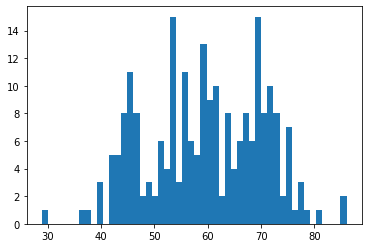

In [37]:
plt.hist(popular, bins = 50)

In [53]:
X = df_final[["neg"]]
y = df_final.popularity
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X, y)

LinearRegression()

In [54]:
regr.coef_

array([7.81176096])

In [55]:
regr.score(X,y)

0.0034637590250857775